#  start

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Loading Data

In [3]:
# Loading the datasets
df_train = pd.read_csv('Weather Training Data.csv')
df_test = pd.read_csv('Weather Test Data.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42677 entries, 0 to 42676
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         42677 non-null  object 
 1   Location       42677 non-null  object 
 2   MinTemp        42483 non-null  float64
 3   MaxTemp        42585 non-null  float64
 4   Rainfall       42250 non-null  float64
 5   Evaporation    24365 non-null  float64
 6   Sunshine       22178 non-null  float64
 7   WindGustDir    39868 non-null  object 
 8   WindGustSpeed  39887 non-null  float64
 9   WindDir9am     39670 non-null  object 
 10  WindDir3pm     41547 non-null  object 
 11  WindSpeed9am   42264 non-null  float64
 12  WindSpeed3pm   41882 non-null  float64
 13  Humidity9am    42136 non-null  float64
 14  Humidity3pm    41573 non-null  float64
 15  Pressure9am    38411 non-null  float64
 16  Pressure3pm    38432 non-null  float64
 17  Cloud9am       26592 non-null  float64
 18  Cloud3

In [6]:
# Preparing the combined dataset for preprocessing
X = df_train.drop(columns=['RainTomorrow'])  # Features
y = df_train['RainTomorrow']  # Target variable
df = pd.concat([X, df_test], axis=0)  # Combining training features and test set for uniform preprocessing

In [7]:
# Identifying Missing Values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
print(missing_values[missing_values > 0])

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
dtype: int64


# Data Insights Before Preprocessing

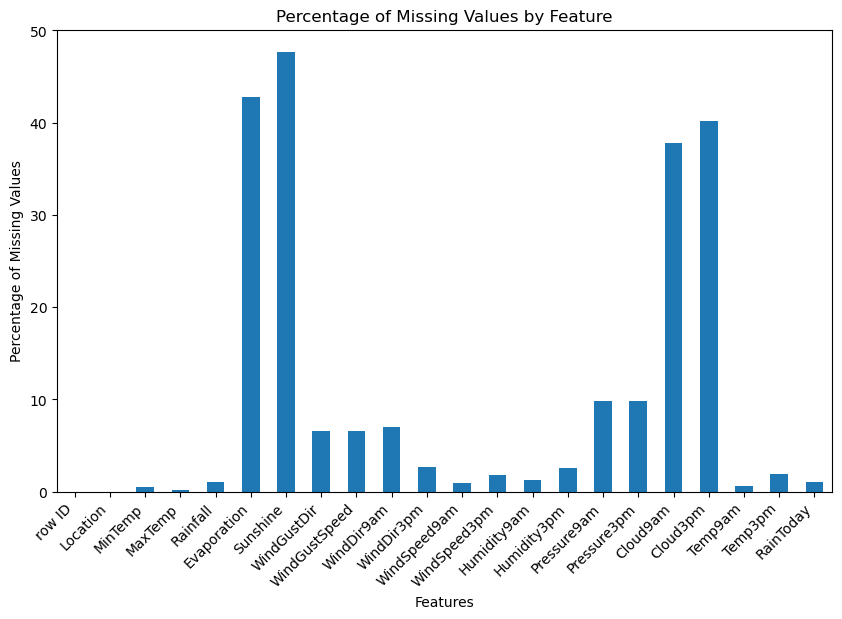

In [8]:
# Plotting
plt.figure(figsize=(10, 6))
missing_percent.plot(kind='bar')
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.show()

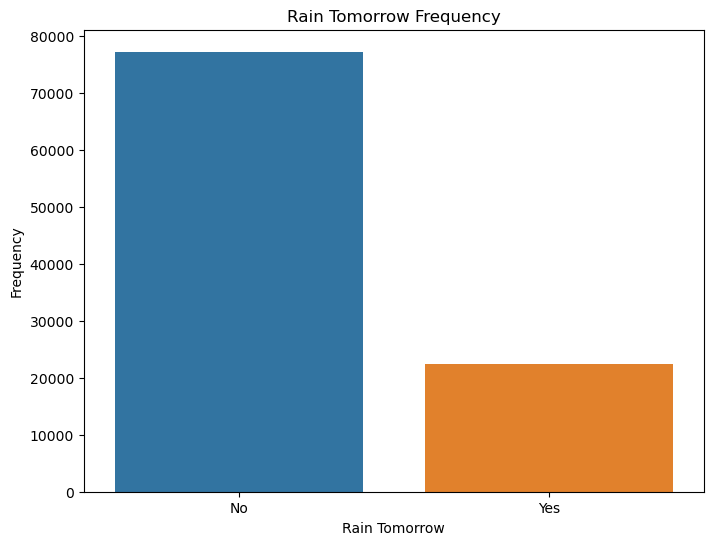

In [9]:
# Plot if it is going to Rain Tomorrow
plt.figure(figsize=(8, 6))
sns.countplot(x=df_train['RainTomorrow'])
plt.title('Rain Tomorrow Frequency')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  
plt.show()

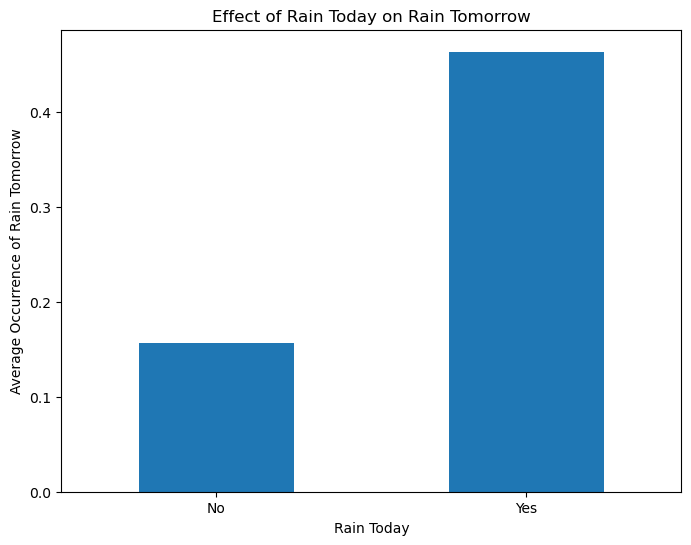

In [10]:
# Group by 'RainToday' and calculate the mean for 'RainTomorrow'
df_train['RainToday_numeric'] = df_train['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0)
rain_today_tomorrow = df_train.groupby('RainToday_numeric')['RainTomorrow'].mean()
plt.figure(figsize=(8, 6))
rain_today_tomorrow.plot(kind='bar')
plt.title('Effect of Rain Today on Rain Tomorrow')
plt.xlabel('Rain Today')
plt.ylabel('Average Occurrence of Rain Tomorrow')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

In [11]:
# Visualizing correlations between features
plt.figure(figsize=(17,18))
cor = new_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues, fmt='.2f')

NameError: name 'new_train' is not defined

<Figure size 1700x1800 with 0 Axes>

In [ ]:
# Relationship between Max Temperature and Rain Tomorrow
plt.figure(figsize=(10, 6))
sns.boxplot(x='RainTomorrow', y='MaxTemp', data=new_train)
plt.title('Max Temperature vs Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Max Temperature')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [ ]:
# Relationship between Humidity at 3 PM and Rain Tomorrow
plt.figure(figsize=(10, 6))
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=new_train)
plt.title('Humidity at 3 PM vs Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Humidity at 3 PM (%)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [12]:
# Relationship between Wind Gust Speed and Rain Tomorrow
plt.figure(figsize=(10, 6))
sns.boxplot(x='RainTomorrow', y='WindGustSpeed', data=new_train)
plt.title('Wind Gust Speed vs Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Wind Gust Speed (km/h)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


NameError: name 'new_train' is not defined

<Figure size 1000x600 with 0 Axes>

#  Data Preprocessing

In [127]:
# Removing 'row ID' as it's not a feature
# The 'row ID' column likely contains unique identifiers for the rows and does not provide any useful information for the model. 
# The 'drop' method is used to remove this column from the DataFrame. 
# The 'inplace=True' argument means that the DataFrame is modified in place and no new DataFrame is returned.
df.drop(columns='row ID', inplace=True)

# Identifying missing data for potential imputation or removal
# Here, we calculate the total number of missing values for each feature in the DataFrame.
# 'isnull()' generates a boolean mask where True indicates missing/NA values.
# 'sum()' then counts the number of True values for each column, giving us the total count of missing values.
total = df.isnull().sum().sort_values(ascending=False)

# Next, we calculate the percentage of missing values for each feature.
# 'df.isnull().count()' gives us the total number of values (missing or not) for each column,
# which we use as the denominator for calculating the percentage.
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

# 'pd.concat' is used to concatenate the 'total' and 'percent' series into a DataFrame for easier analysis.
# 'axis=1' means we concatenate along the columns (side by side, rather than one on top of the other).
# 'keys' assigns column names to the resulting DataFrame, labeling the counts as 'Total' and the percentages as 'Percent'.
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


In [128]:
# Dropping columns with a high percentage of missing values
# The 'Sunshine' and 'Evaporation' columns are being dropped from the DataFrame because they have a high number of missing values.
# When a significant portion of a column is missing, it can be more detrimental to impute these values, as it may introduce bias.
# Therefore, the decision is made to drop these columns entirely.
df.drop(columns=['Sunshine', 'Evaporation'], inplace=True)

# Imputing missing values for categorical variables with the most frequent category
# First, we're identifying all columns in the DataFrame that are of type 'object', which usually indicates categorical data.
categorical = df.select_dtypes(include="object").columns

# We then create a ColumnTransformer. This is a scikit-learn transformer that applies transformers to columns of an array or pandas DataFrame.
# Here, it is set up to apply a SimpleImputer to the categorical columns.
# The SimpleImputer replaces missing values with the most common value in each column.
# 'strategy='most_frequent'' specifies that we want to fill in missing values with the most frequent value in the column.
cleaner = ColumnTransformer([
    ('categorical_transformer', SimpleImputer(strategy='most_frequent'), categorical)
])

# The 'fit_transform' method of 'cleaner' is called on the categorical columns of the DataFrame.
# This calculates the most frequent value in each column (fit), and then replaces missing values with these most frequent values (transform).
df[categorical] = cleaner.fit_transform(df[categorical])


In [53]:
# Filling remaining numeric missing values with median
# This section targets numeric columns within the DataFrame, which is indicated by selecting data types that are numbers (np.number).
# The 'median()' function is used to compute the median value for each numeric column.
# 'fillna()' is then applied to fill in any missing (NaN) values in these numeric columns with their respective median values.
# This method is chosen because the median is less sensitive to outliers than the mean and can be a more robust measure for central tendency in the presence of outliers.
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Encoding categorical variables to numeric
# This section identifies columns with datatype 'object', which typically represent categorical variables.
# Each of these categorical variables is then encoded into numeric format using LabelEncoder.
# LabelEncoder converts each class under a feature to a numerical value, which is necessary because most machine learning algorithms can only handle numerical input.
objects = df.select_dtypes(include="object").columns
for i in range(len(objects)):
    df[objects[i]] = LabelEncoder().fit_transform(df[objects[i]])

# Splitting the preprocessed data back into training and test datasets
# This segment of code separates the original DataFrame back into the training and test datasets based on their original row index.
# The training set is extracted by slicing the DataFrame up to the row index 99516.
# Then, the target variable 'y', which is assumed to be defined and contains the 'RainTomorrow' values for the training set, is concatenated back to the training set.
# This reattachment of the target variable is crucial for supervised learning.
# The test set is similarly sliced from the DataFrame starting from row index 99516 to the end of the DataFrame.
train = df.iloc[:99516,:]
new_train = pd.concat([train, y], axis=1)
test = df.iloc[99516:, :]

In [58]:
# Balancing the dataset by upsampling the minority class
# Here, we separate the data into two groups based on the target variable 'RainTomorrow':
# 'df_majority_0' contains all samples where 'RainTomorrow' is 0 (the majority class)
# 'df_minority_1' contains all samples where 'RainTomorrow' is 1 (the minority class)
df_majority_0 = new_train[(new_train['RainTomorrow']==0)]
df_minority_1 = new_train[(new_train['RainTomorrow']==1)]

# We then upsample the minority class. 'resample' creates a new set of samples from the minority class by randomly sampling with replacement.
# 'n_samples=77157' indicates we want to upsample the minority class to have 77157 instances, which is presumably the size of the majority class.
# 'random_state=42' ensures that the upsampling is reproducible; you'll get the same samples each time you run this code.
df_minority_upsampled = resample(df_minority_1, replace=True, n_samples=77157, random_state=42)

# After upsampling, we concatenate the upsampled minority data with the original majority class data, giving us a balanced dataset.
df_upsampled = pd.concat([df_minority_upsampled, df_majority_0])

# Preparing features and target variable for model training
# Here we prepare the upsampled dataset for model training.
# We drop the target variable 'RainTomorrow' from the features since it's what we want to predict.
# The dropped 'RainTomorrow' column is then assigned to 'y', which will be used as the target variable for model training.
X = df_upsampled.drop(columns='RainTomorrow')
y = df_upsampled['RainTomorrow']

# Finally, we split the balanced dataset into training and test sets using 'train_test_split'.
# 'train_size=0.9' indicates that 90% of the data will be used for training and the rest for testing.
# 'shuffle=True' ensures the data is shuffled before splitting, so the train and test sets are random subsets of the data.
# 'random_state=44' is used for reproducibility, ensuring that the same random shuffle occurs every time this code is run.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=44)


#  Models

In [59]:
# Training and evaluating a Random Forest Classifier
RandomForestClassifierModel = RandomForestClassifier(criterion='gini', max_depth=17, n_estimators=100, random_state=44)
RandomForestClassifierModel.fit(X_train, y_train)
rf_train_score = RandomForestClassifierModel.score(X_train, y_train)
rf_test_score = RandomForestClassifierModel.score(X_test, y_test)
print('RandomForestClassifierModel Train Score is : ', rf_train_score)
print('RandomForestClassifierModel Test Score is : ', rf_test_score)

RandomForestClassifierModel Train Score is :  0.9770452614449676
RandomForestClassifierModel Test Score is :  0.921461897356143


In [1]:
# Training and evaluating a Logistic Regression
LogisticRegressionModel = LogisticRegression(solver='liblinear')
LogisticRegressionModel.fit(X_train, y_train)
lr_train_score = LogisticRegressionModel.score(X_train, y_train)
lr_test_score = LogisticRegressionModel.score(X_test, y_test)
print("Logistic RegressionModel Train Score is : ", lr_train_score)
print("Logistic RegressionModel Test Score is : ", lr_test_score)


NameError: name 'LogisticRegression' is not defined

# Evaluation

In [61]:
# Classification report for Random Forest Classifier
rf_cr = classification_report(y_test, RandomForestClassifierModel.predict(X_test))
print("Random Forest Classifier Classification Report:\n", rf_cr)

# Classification report for Logistic Regression
lr_cr = classification_report(y_test, LogisticRegressionModel.predict(X_test))
print("Logistic Regression Classification Report:\n", lr_cr)

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7709
           1       0.90      0.95      0.92      7723

    accuracy                           0.92     15432
   macro avg       0.92      0.92      0.92     15432
weighted avg       0.92      0.92      0.92     15432

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      7709
           1       0.79      0.76      0.77      7723

    accuracy                           0.78     15432
   macro avg       0.78      0.78      0.78     15432
weighted avg       0.78      0.78      0.78     15432



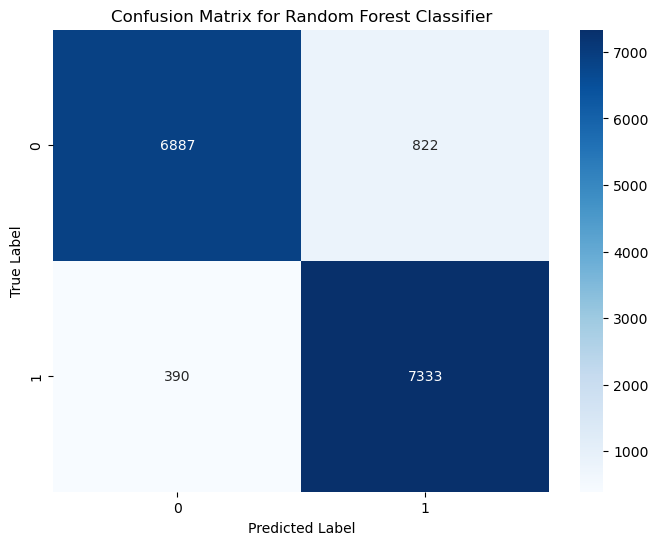

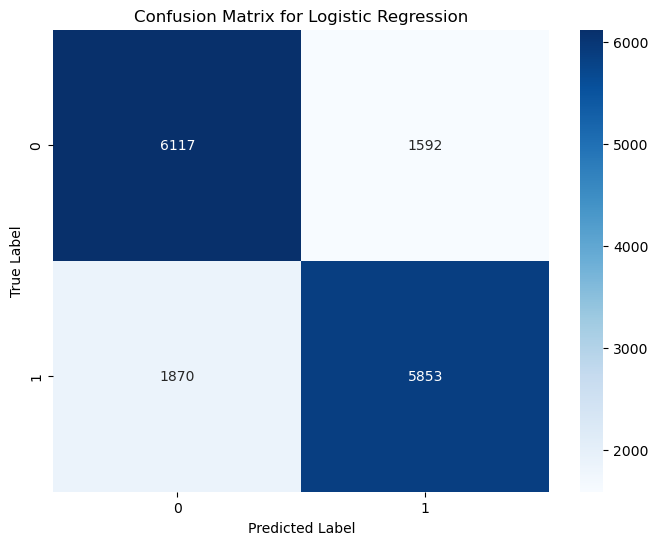

In [62]:
# Generate predictions from the Random Forest Classifier
y_pred_rf = RandomForestClassifierModel.predict(X_test)

# Generate predictions from the Logistic Regression
y_pred_lr = LogisticRegressionModel.predict(X_test)

# Now that you have the predictions, you can calculate the confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Visualize the confusion matrix for the Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Visualize the confusion matrix for the Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()